# **Problem Description**

Fronze Lake is a simple game where you are on a frozen lake and you need to retrieve an item on the frozen lake where some parts are frozen and some parts are holes (if you walk into them you die)

**Actions:** A= {0,1,2,3}
* LEFT: 0
* DOWN = 1
* RIGHT = 2
* UP = 3

**Observation Space**
Whole lake is a 4 x 4 grid world, S= {0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15}

**On each grid, there are 4 possibilities**
* S: starting point, safe (code = 'SFFF')
* F: frozen surface, safe (code = 'FHFH')
* H: hole, fall to your doom (code = 'FFFH')
* G: goal, where the frisbee is located ('HFFG')

**Objective:**

The key here is we want to get to G without falling into the hole H in the shortest amount of time

## **The Bellman equation**


1.   helps us solve the Markov decision process (MDP)
2.  solve the MDP, by finding the optimal policy.

The Bellman equation is **ubiquitous
in reinforcement learning** and is widely used for **finding the optimal value and Q functions recursively**. Computing the optimal value and Q functions is very
important because once we have the **optimal value or optimal Q function**, then
we can use them to **derive the optimal policy.**

##*V(s) = R(s,a,s') + 𝛾V(s')*

In the above equation, the following applies:

*   𝑅(s,a,s') implies the immediate reward obtained while performing an action a in state s and moving to the next state 𝑠′
*   𝛾 is the discount factor
* V(s') implies the value of the next state

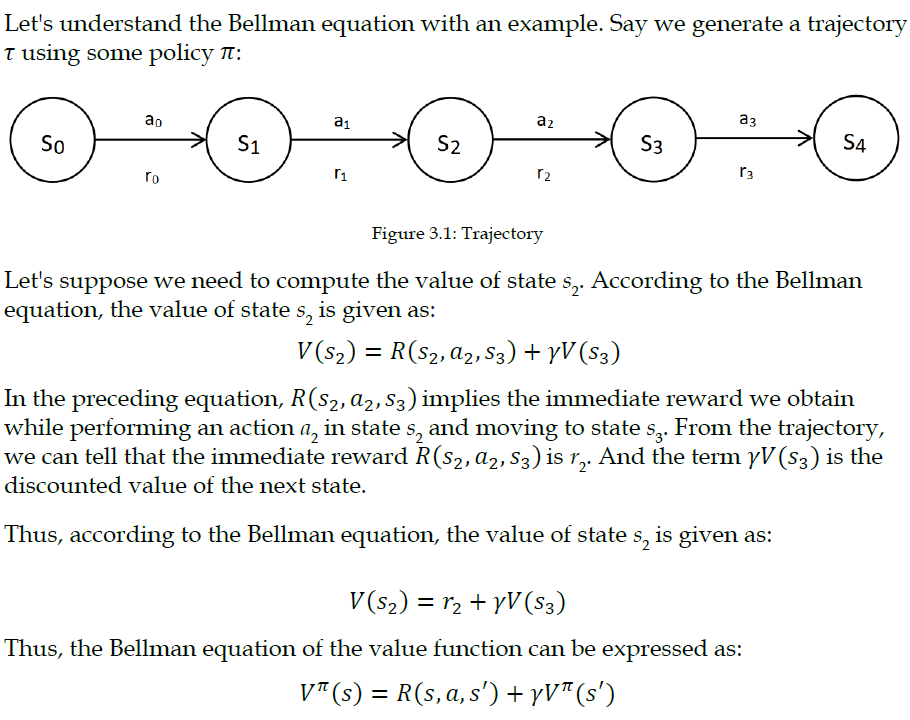

Where the superscript 𝜋 implies that we are using policy 𝜋 . The right-hand side term is often called the  **Bellman backup**.
The preceding Bellman equation works only when we have a **deterministic
environment**.

Let's suppose our environment is stochastic, then in that case, when we
perform an action a in state s, it is not guaranteed that our next state will always be 𝑠′; it could be some other states too.

As we can see, when we perform an action a1 in state s1, with a probability 0.7, we
reach state s2, and with a probability 0.3, we reach state s3:

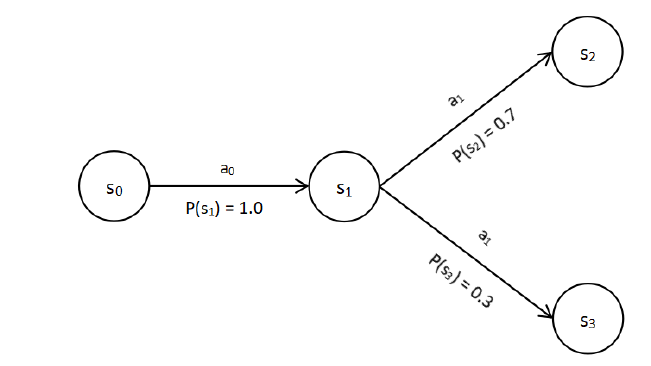

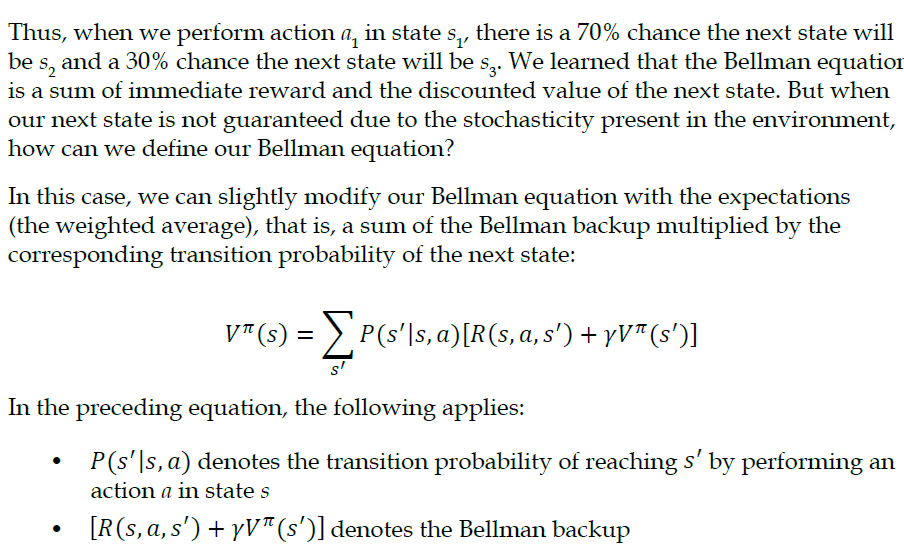

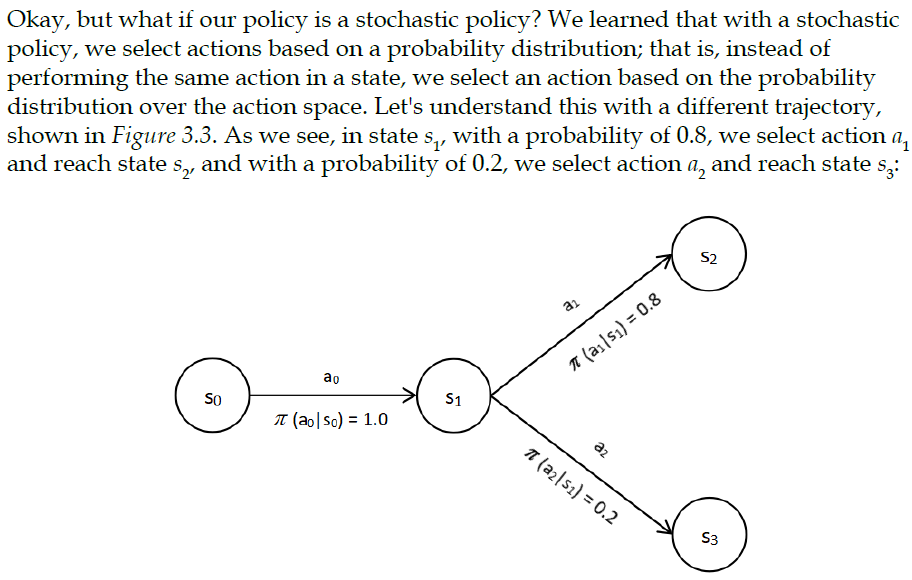

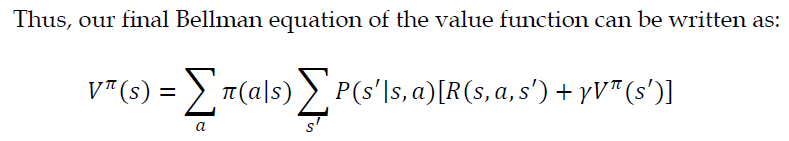

##The Bellman equation of the Q function

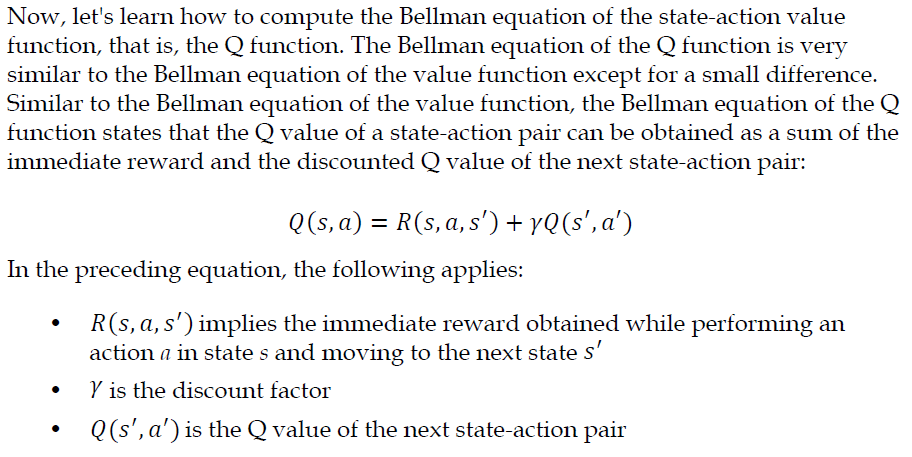

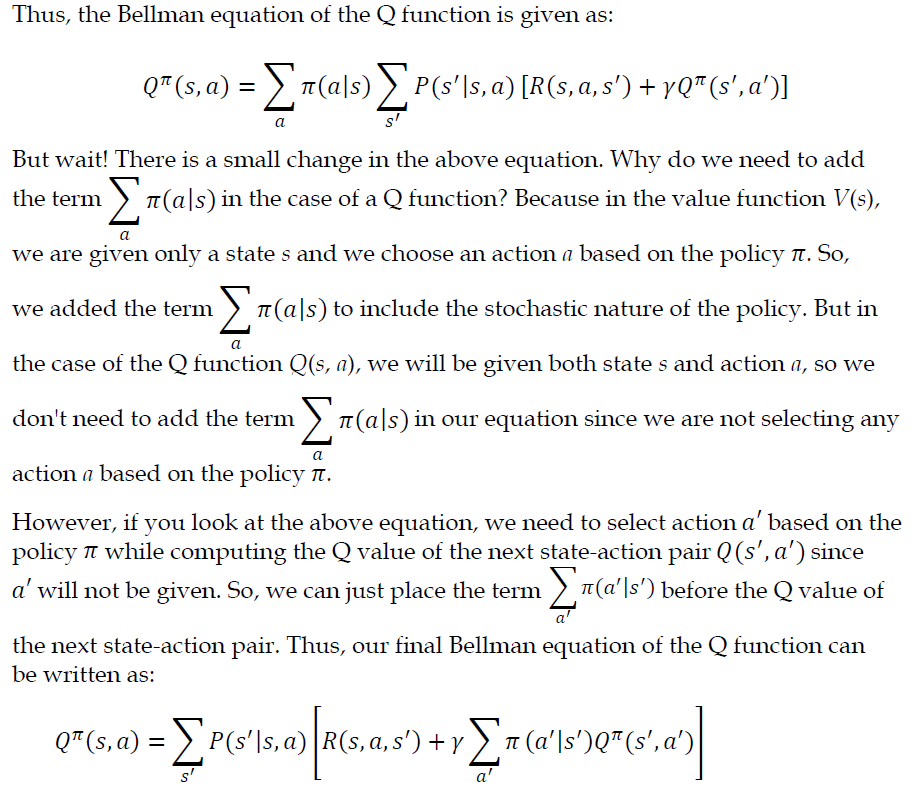

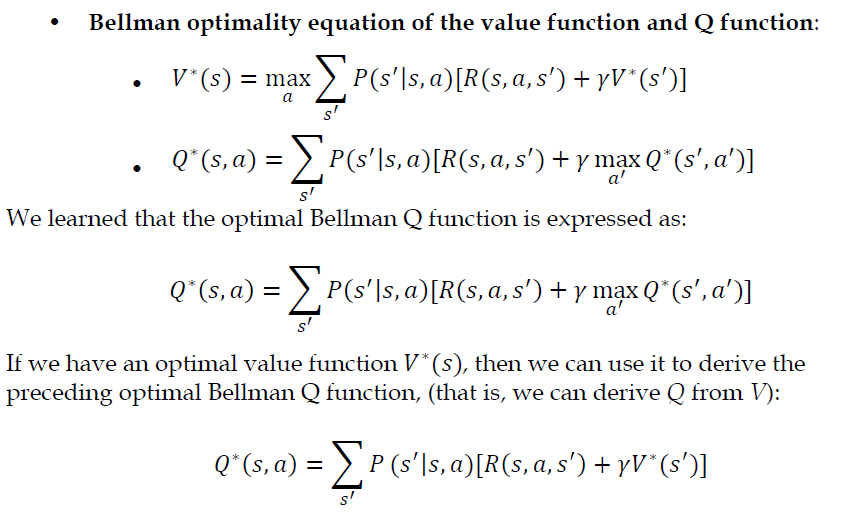

#**Value Iteration**

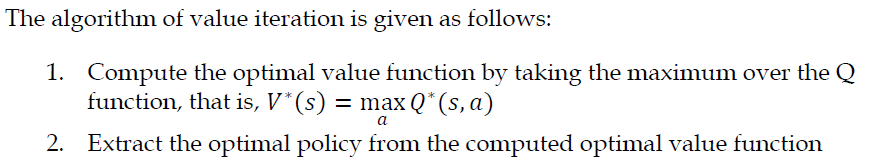

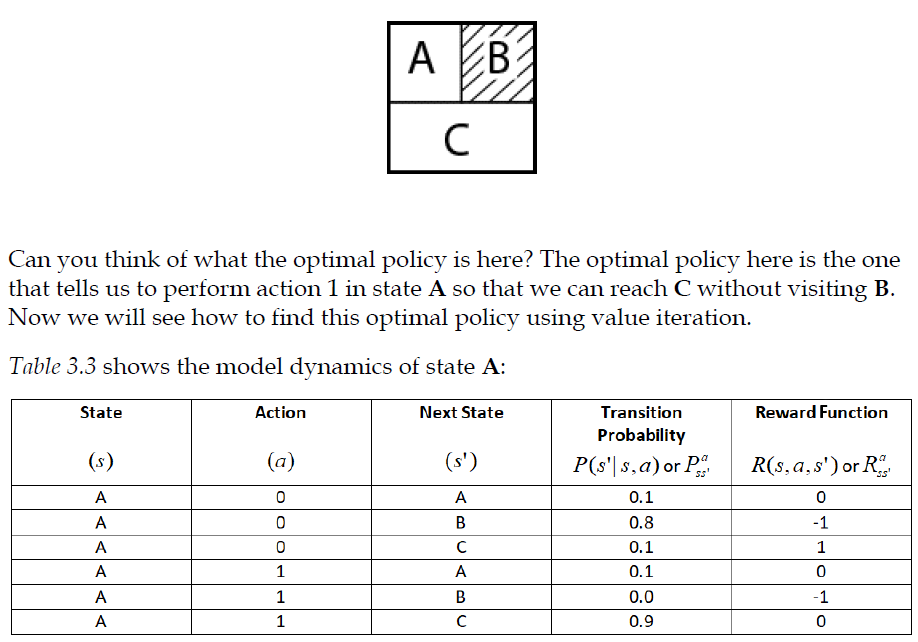

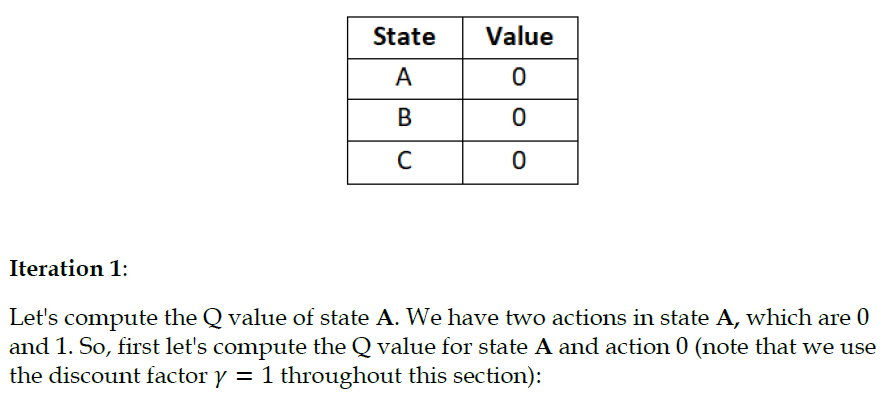

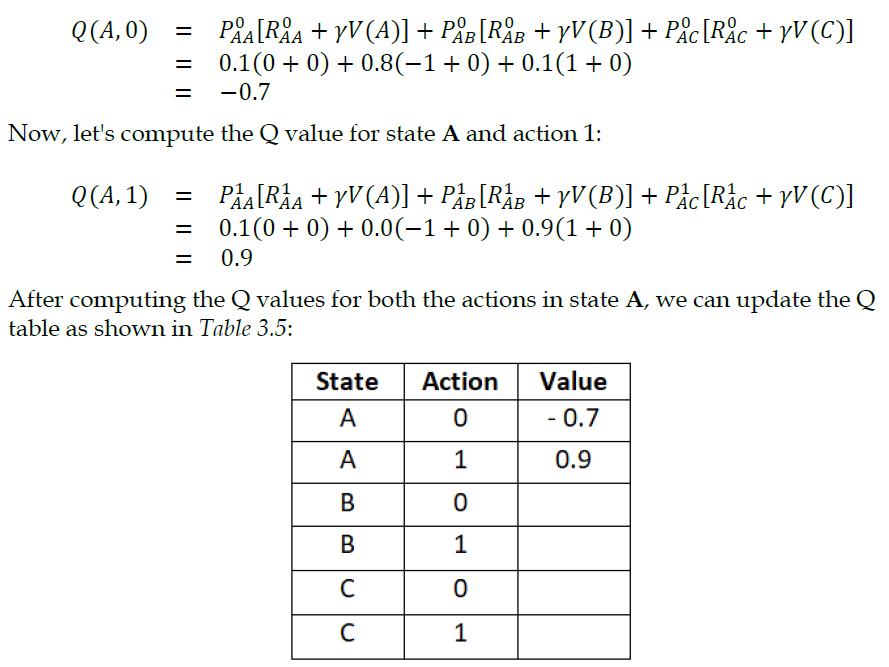

##**Extract the optimal policy from the optimal value function obtained from previous step**

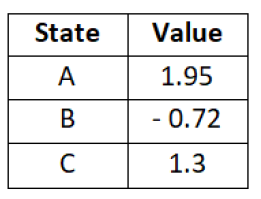

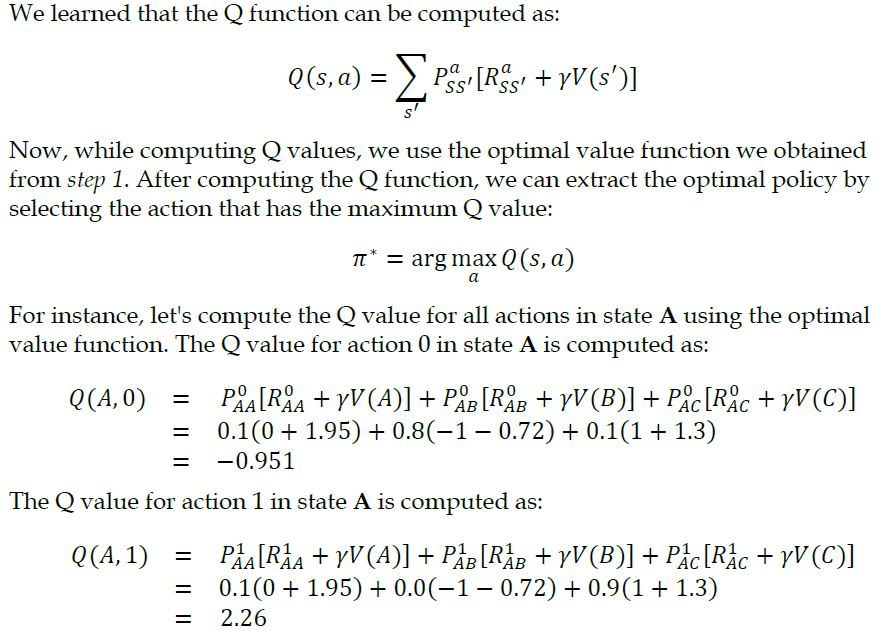

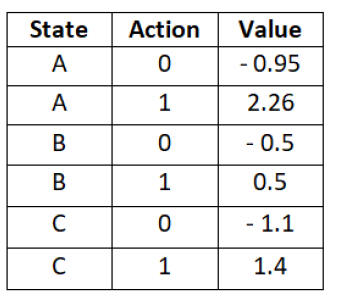

##**Solving the Frozen Lake problem with value iteration**

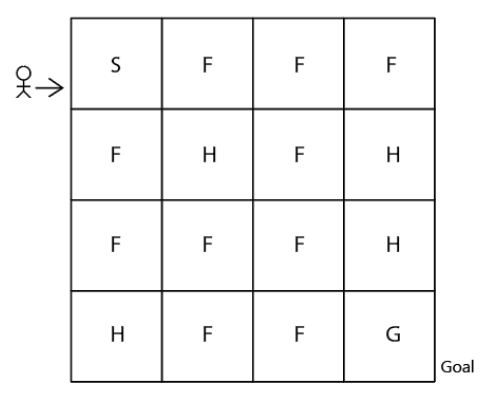

# **Execution:**

In [1]:
import gym
import numpy as np

In [2]:
env = gym.make('FrozenLake-v1')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
env.reset()
env.render()

/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


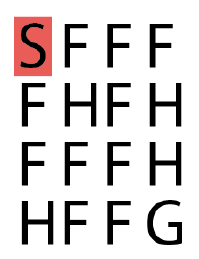

In [4]:
nb_states = env.observation_space.n
nb_actions = env.action_space.n

print(nb_states)
print(nb_actions)

16
4


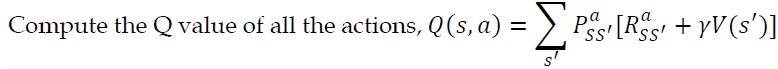

In [5]:
def value_iteration(env):
  num_iterations = 1000
  threshold = 1e-20
  gamma = 1.0
  value_table = np.zeros(env.observation_space.n)
  for i in range(num_iterations):
    updated_value_table = np.copy(value_table)
    for s in range(env.observation_space.n):
      Q_values = [sum([prob*(r + gamma * updated_value_table[s_])
                for prob, s_, r, _ in env.P[s][a]])
                for a in range(env.action_space.n)]
      # env.render()
      value_table[s] = max(Q_values)

    if (np.sum(np.fabs(updated_value_table - value_table)) <= threshold):
      break
  return value_table

In [6]:
def extract_policy(value_table):
  gamma = 1.0
  policy = np.zeros(env.observation_space.n)
  for s in range(env.observation_space.n):
    Q_values = [sum([prob*(r + gamma * value_table[s_])
                for prob, s_, r, _ in env.P[s][a]])
                for a in range(env.action_space.n)]
    policy[s] = np.argmax(np.array(Q_values))
  return policy

In [7]:
optimal_value_function = value_iteration(env)
print(optimal_value_function)

[0.82352941 0.82352941 0.82352941 0.82352941 0.82352941 0.
 0.52941176 0.         0.82352941 0.82352941 0.76470588 0.
 0.         0.88235294 0.94117647 0.        ]


In [8]:
optimal_policy = extract_policy(optimal_value_function)

In [9]:
print(optimal_policy)

[0. 3. 3. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


##Using Policy Iteration

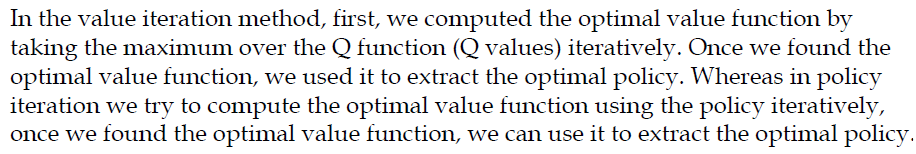

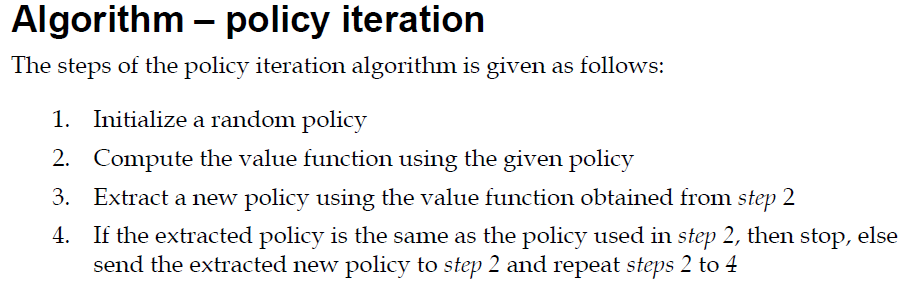

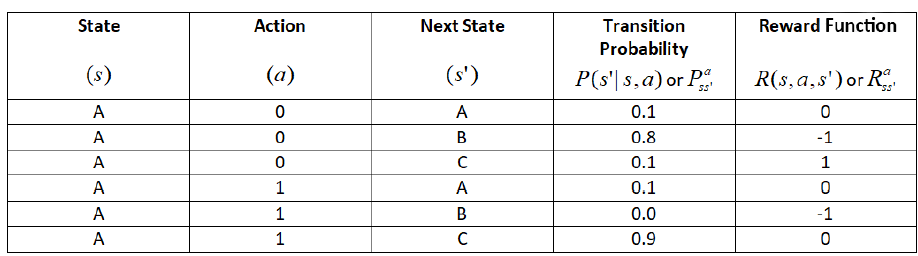

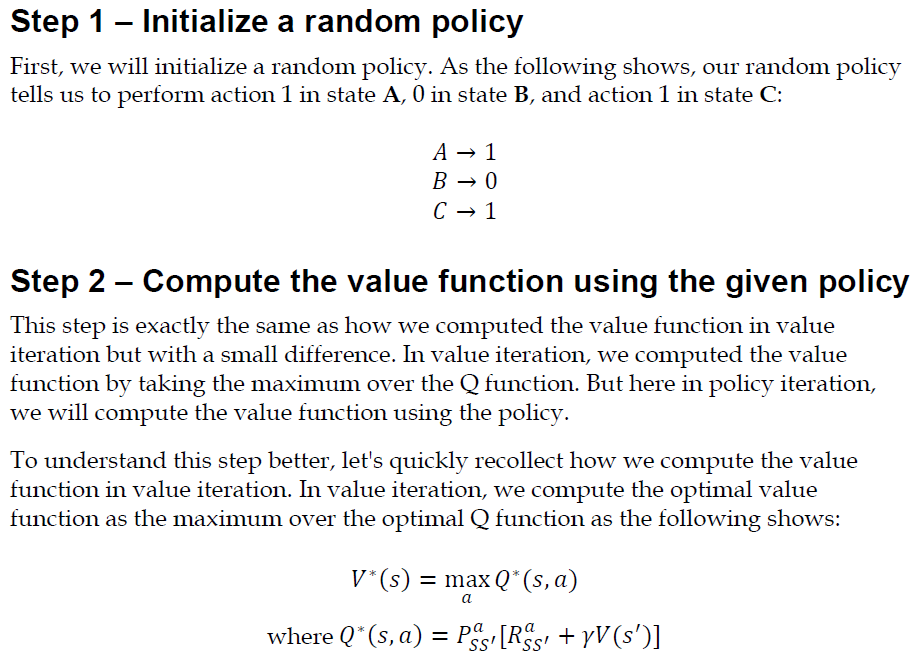

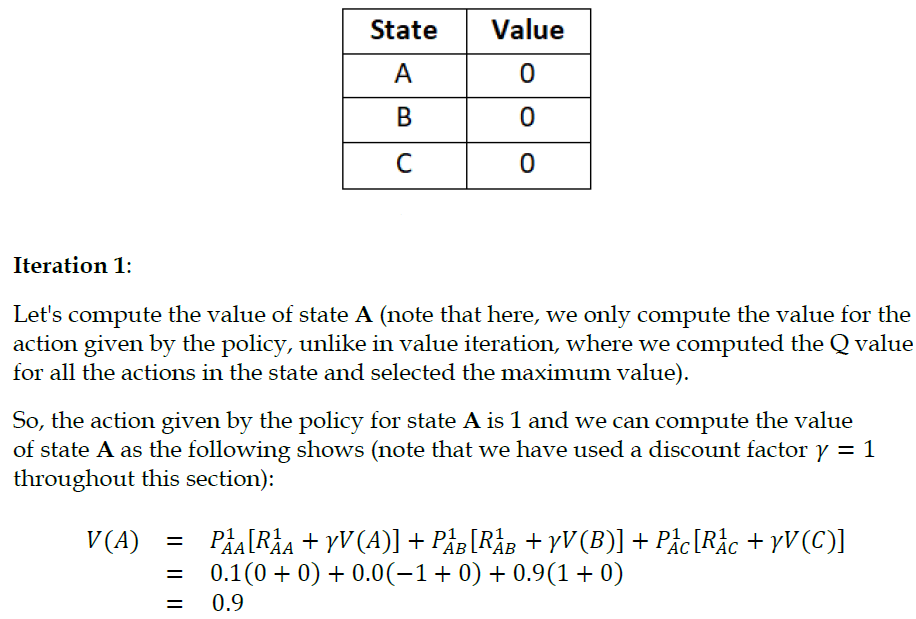

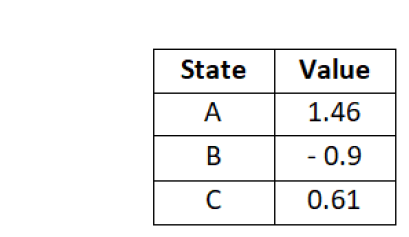

## **Step 3 – Extract a new policy using the value function obtained from the previous step**

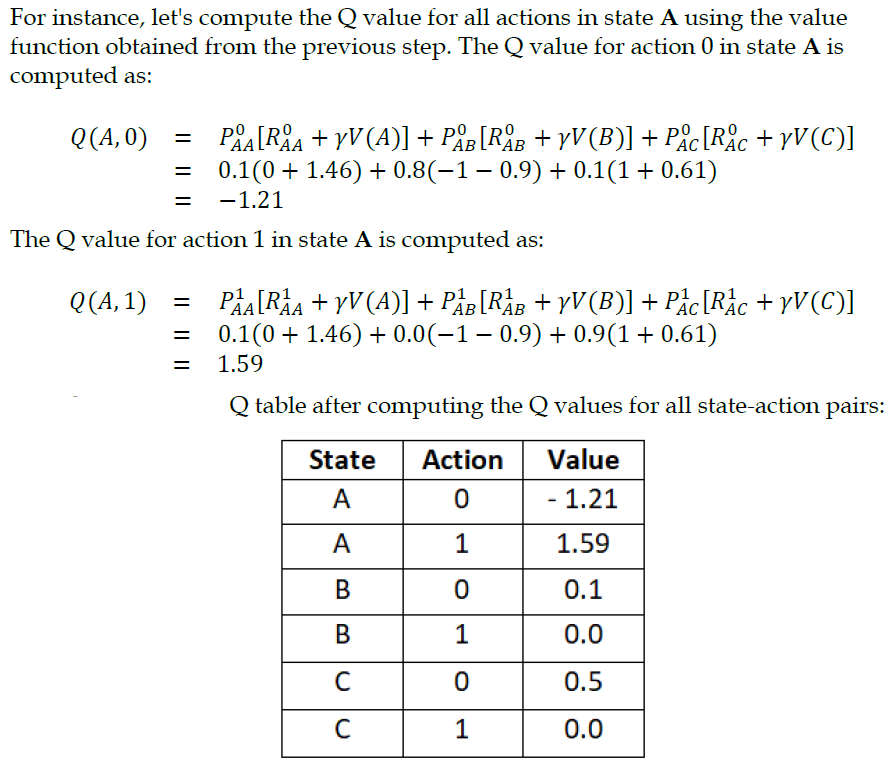

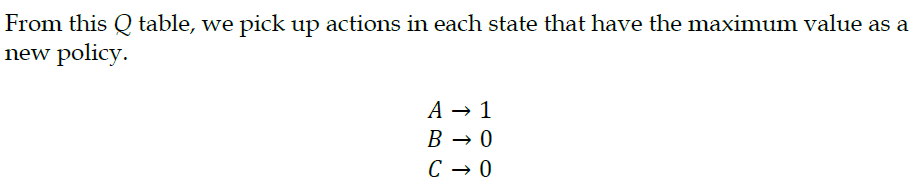

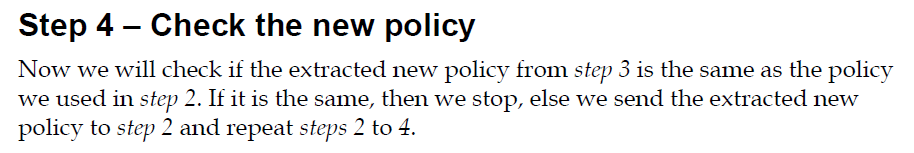

In [10]:
import gym
import numpy as np

In [11]:
env = gym.make('FrozenLake-v1')

In [12]:
def compute_value_function(policy):
  num_iterations = 1000
  threshold = 1e-20
  gamma = 1.0
  value_table = np.zeros(env.observation_space.n)
  for i in range(num_iterations):
    updated_value_table = np.copy(value_table)
    for s in range(env.observation_space.n):
      a = policy[s]
      value_table[s] = sum([prob * (r + gamma * updated_value_table[s_])
                  for prob, s_, r, _ in env.P[s][a]])
    if (np.sum(np.fabs(updated_value_table - value_table)) <= threshold):
      break

  return value_table

In [13]:
def extract_policy(value_table):
  gamma = 1.0
  policy = np.zeros(env.observation_space.n)
  for s in range(env.observation_space.n):
    Q_values = [sum([prob*(r + gamma * value_table[s_])
          for prob, s_, r, _ in env.P[s][a]])
          for a in range(env.action_space.n)]
    policy[s] = np.argmax(np.array(Q_values))
  return policy

In [14]:
def policy_iteration(env):
  num_iterations = 1000
  policy = np.zeros(env.observation_space.n)
  for i in range(num_iterations):
    value_function = compute_value_function(policy)
    new_policy = extract_policy(value_function)
    if (np.all(policy == new_policy)):
      break
    policy = new_policy
  return policy

In [15]:
optimal_policy = policy_iteration(env)

In [16]:
print(optimal_policy)

[0. 3. 3. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


# **References:**
* https://github.com/udacity/deep-reinforcement-learning/blob/master/dynamic-programming/Dynamic_Programming.ipynb
* https://www.deeplearningwizard.com/deep_learning/deep_reinforcement_learning_pytorch/dynamic_programming_frozenlake/#frozen-lake-introduction
* https://medium.com/@deekshaml04/solving-dynamic-programming-problem-with-reinforcement-learning-3e96e32e409c
* https://towardsdatascience.com/planning-by-dynamic-programming-reinforcement-learning-ed4924bbaa4c